# Andrew Nell
# adn323
# Civic Analytics and Urban Intelligence - Problem Set 2
## Import Functions and Packages

In [1100]:
#standard packages
from __future__ import print_function, division
import numpy as np
import pandas as pd
import pylab as pl

# Special packages
import geopandas as gp
from geopy.geocoders import Nominatim
#import geopy as gpy
from pandas.tools.plotting import scatter_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf
import datetime as dt
import scipy.stats as st
import seaborn  as sns
import os
import json

import requests

# Inline plotting
% pylab inline

# Please not all file names and directories will need to be updated for the notebook to be repeatable. 

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Import all Data Sets
### Local Law 84

### Pluto
Only taking 2014 data, however 2012-2014 data should be used with average 3 year figures due to Asthma figures

### ACS Data
Only taking 2014 data, however 2012-2014 data should be used with average 3 year figures due to Asthma figures

### Asthma Data
 Andrew Guobing Chen helped with the data, as I did not have a computer and could not install packages to webscrape the data from the Webpage. Functions such as pd.read_html did not work. 

## Read in data and clean and organise and Descriptive Statistics
### Local Law 84

In [1101]:
# Read in data into data frame
#LL84 = pd.read_csv('/wingrdp/homedirs/adn323/CAUI2017_adn323/Data/LL84_2014.csv')
LL84 = pd.read_csv('LL84_2014.csv')
LL84.head()

,Record Number,BBL,Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identification Numbers (BINs),Street Number,Street Name,Borough,Postcode,BBL on the Covered Buildings List,...,DOF Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,DOF Number of Buildings,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,NTA
0,2830985.0,4160830037,NaN,NaN,4303321,71,BEACH 70 STREET,QUEENS,11692.0,Yes,...,155000.0,Multifamily Housing,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2858535.0,4002520018,NaN,NaN,4003447,32-36,47 AVENUE,QUEENS,11101.0,Yes,...,184400.0,Office,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2804445.0,3009747504,NaN,NaN,3392416,302,2 AVENUE,BROOKLYN,11215.0,Yes,...,58506.0,Multifamily Housing,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2805372.0,4032937501,NaN,NaN,4308252,110,73 ROAD,QUEENS,11375.0,Yes,...,100800.0,Multifamily Housing,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2664866.0,4000540006,NaN,NaN,4000460,11-36,45 ROAD,QUEENS,11101.0,Yes,...,56000.0,Worship Facility,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1102]:
LL84.shape

(13974, 33)

In [1103]:
LL84.columns

Index([u'Record Number', u'BBL', u'Co-reported BBL Status',
       u'BBLs Co-reported',
       u'Reported NYC Building Identification Numbers (BINs)',
       u'Street Number', u'Street Name', u'Borough', u'Postcode',
       u'BBL on the Covered Buildings List',
       u'DOF Benchmarking Submission Status', u'Site EUI(kBtu/ft2)',
       u'Weather Normalized Site EUI(kBtu/ft2)', u'Source EUI(kBtu/ft2)',
       u'Weather Normalized Source EUI(kBtu/ft2)',
       u'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       u'Automatic Water Benchmarking Eligible', u'Reported Water Method',
       u'ENERGY STAR Score', u'Total GHG Emissions(MtCO2e)',
       u'Direct GHG Emissions(MtCO2e)', u'Indirect GHG Emissions(MtCO2e)',
       u'Reported Property Floor Area (Building(s)) (ft²)',
       u'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       u'Primary Property Type - Self Selected', u'DOF Number of Buildings',
       u'Latitude', u'Longitude', u'Community Board', u'Co

In [1104]:
# Drop irrelevant columns from data set
LL84.drop(['Record Number', 'Co-reported BBL Status',
           'BBLs Co-reported','Street Number', 'Street Name',
           'Reported NYC Building Identification Numbers (BINs)',
           'BBL on the Covered Buildings List',
           'DOF Benchmarking Submission Status',
           'Weather Normalized Site EUI(kBtu/ft2)',
           'Weather Normalized Source EUI(kBtu/ft2)','Direct GHG Emissions(MtCO2e)', 
           'Indirect GHG Emissions(MtCO2e)',
           'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
           'Automatic Water Benchmarking Eligible', 'Reported Water Method',
           'ENERGY STAR Score', 
           'DOF Property Floor Area (Buildngs and Parking)(ft2)',
           'DOF Number of Buildings',
           'Latitude', 'Longitude','BIN'],axis=1,inplace=True)

In [1105]:
# Check data types to see if formattable and suitable for procesing
LL84.dtypes

BBL                                                   int64
Borough                                              object
Postcode                                            float64
Site EUI(kBtu/ft2)                                  float64
Source EUI(kBtu/ft2)                                 object
Total GHG Emissions(MtCO2e)                          object
Reported Property Floor Area (Building(s)) (ft²)     object
Primary Property Type - Self Selected                object
Community Board                                     float64
Council District                                    float64
Census Tract                                        float64
NTA                                                  object
dtype: object

In [1106]:
# Rename some variables
LL84.rename(columns={'Reported Property Floor Area (Building(s)) (ft²)':'Floor_Area(ft2)'},
            inplace=True)

# Drop NaN's where necessary
LL84 = LL84.dropna(subset=["Postcode",'Community Board'])

# Ensure Data in corect format for merging and processing
LL84.Postcode = LL84.Postcode.astype(int)
LL84['Total GHG Emissions(MtCO2e)'] = pd.to_numeric(LL84['Total GHG Emissions(MtCO2e)'], errors='coerce')
LL84['Source EUI(kBtu/ft2)'] = pd.to_numeric(LL84['Source EUI(kBtu/ft2)'], errors='coerce')
LL84['Floor_Area(ft2)'] = pd.to_numeric(LL84['Floor_Area(ft2)'], errors='coerce')
LL84['Community Board'] = LL84['Community Board'].astype(int)
LL84['Council District'] = LL84['Council District'].astype(int)
LL84['Census Tract'] = LL84['Census Tract'].astype(int)

# Ensure NTA strings in correct format
LL84.NTA = LL84.NTA.str.strip()

# Create Absilute Energy Usage Variable
LL84['GHG Intensity'] = LL84['Total GHG Emissions(MtCO2e)']/LL84['Floor_Area(ft2)']*1000

# Check Data Types
print(LL84.dtypes)
print(LL84.shape)

BBL                                        int64
Borough                                   object
Postcode                                   int64
Site EUI(kBtu/ft2)                       float64
Source EUI(kBtu/ft2)                     float64
Total GHG Emissions(MtCO2e)              float64
Floor_Area(ft2)                          float64
Primary Property Type - Self Selected     object
Community Board                            int64
Council District                           int64
Census Tract                               int64
NTA                                       object
GHG Intensity                            float64
dtype: object
(9572, 13)


In [1107]:
# Find out Unique Borough Names
LL84.Borough.unique()

array(['MANHATTAN', 'STATEN ISLAND       ', 'BRONX               ',
       'BROOKLYN            ', 'QUEENS', 'QUEENS              '], dtype=object)

In [1108]:
# Create Borough Numbers column and drop Borough Column
LL84['num_boro'] = LL84['Borough'].map({'QUEENS':4, 
                                        'BROOKLYN            ':3,
                                        'BRONX               ':2,
                                        'MANHATTAN':1, 'BROOKLYN':3,
                                        'STATEN ISLAND       ':5,
                                        'QUEENS              ':4, 
                                        'BRONX':2, 'STATEN ISLAND':5})
LL84.drop(['Borough'],axis=1,inplace=True)

In [1109]:
# Drop NaN's in relevant columns
LL84 = LL84.dropna(subset=["Total GHG Emissions(MtCO2e)"])
LL84 = LL84.dropna(subset=["Site EUI(kBtu/ft2)"])
LL84 = LL84.dropna(subset=["Source EUI(kBtu/ft2)"])
LL84 = LL84.dropna(subset=["GHG Intensity"])
LL84.shape # check how much data was lost

(8773, 13)

In [1110]:
LL84.head()

,BBL,Postcode,Site EUI(kBtu/ft2),Source EUI(kBtu/ft2),Total GHG Emissions(MtCO2e),Floor_Area(ft2),Primary Property Type - Self Selected,Community Board,Council District,Census Tract,NTA,GHG Intensity,num_boro
49,1013049001,10022,141.2,273.2,16329.8,1600000.0,Hotel,5,4,100,Turtle Bay-East Midtown,10.206125,1
54,1012860021,10022,141.3,218.2,10815.0,1200000.0,Hotel,5,4,102,Midtown-Midtown South,9.012500,1
97,1012770014,10017,78.1,210.2,5309.8,859682.0,Office,5,4,94,Midtown-Midtown South,6.176470,1
99,1013000033,10017,91.5,227.7,4445.4,627731.0,Office,6,4,92,Turtle Bay-East Midtown,7.081696,1
100,1012910028,10022,81.4,217.4,3981.2,619631.0,Office,5,4,102,Midtown-Midtown South,6.425114,1


In [1111]:
# Review data and see if there are any major outliers
LL84.describe()

,BBL,Postcode,Site EUI(kBtu/ft2),Source EUI(kBtu/ft2),Total GHG Emissions(MtCO2e),Floor_Area(ft2),Community Board,Council District,Census Tract,GHG Intensity,num_boro
count,8.773000e+03,8773.000000,8.773000e+03,8.773000e+03,8.773000e+03,8.773000e+03,8773.000000,8773.000000,8773.000000,8773.000000,8773.000000
mean,1.767546e+09,10403.952924,2.895015e+03,3.551603e+03,2.001383e+04,1.883024e+05,7.126297,15.652570,4867.991337,192.188863,1.743873
std,9.459104e+08,488.981121,1.570537e+05,1.889444e+05,8.552980e+05,3.404544e+05,3.958777,15.631038,13237.479347,10427.476388,0.932484
min,1.000048e+09,10001.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+02,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.011648e+09,10021.000000,6.820000e+01,1.070000e+02,3.713000e+02,6.791400e+04,4.000000,4.000000,98.000000,4.503237,1.000000
50%,1.020990e+09,10065.000000,8.620000e+01,1.341000e+02,5.676000e+02,9.811000e+04,7.000000,9.000000,199.000000,5.773539,1.000000
75%,3.000680e+09,10472.000000,1.072000e+02,1.749000e+02,1.089400e+03,1.755780e+05,9.000000,31.000000,518.000000,7.398680,3.000000
max,5.079910e+09,11694.000000,1.080412e+07,1.299787e+07,6.052160e+07,1.421712e+07,56.000000,51.000000,117602.000000,717378.059622,5.000000


Total Emissions seems to have some outliers with a max substantially more than 2 standard deviations away from mean and with 75% of the data below 1000. suggesting there is substantial data cleaning to do. 

There are NaN values for both EUI and Floor area that may need to be removed if we want to use these data sets.

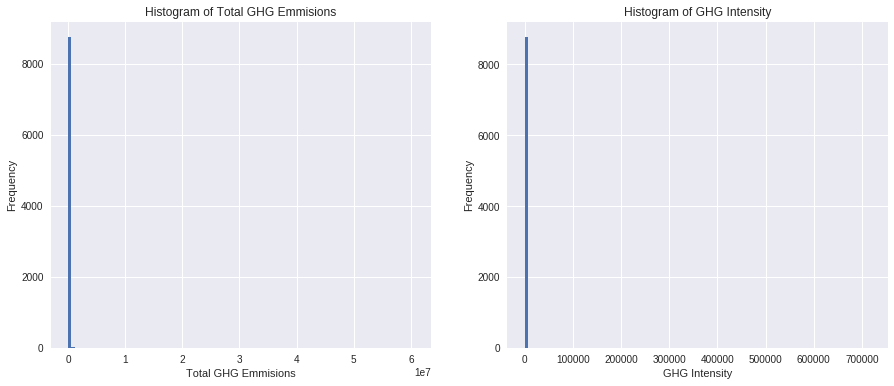

In [1112]:
#Set total figure size
pl.figure(figsize=(15,6))

# Plot histogram of Total Emmisions
pl.subplot(121)
pl.hist(LL84['Total GHG Emissions(MtCO2e)'], bins = 100)

# Format Chart
pl.title("Histogram of Total GHG Emmisions")
pl.xlabel("Total GHG Emmisions")
pl.ylabel("Frequency")

# Plot histogram of GHG Intensity
pl.subplot(122)
pl.hist(LL84['GHG Intensity'], bins = 100)

# Format Chart
pl.title("Histogram of GHG Intensity")
pl.xlabel("GHG Intensity")
pl.ylabel("Frequency")

#### Figure 1 and 2: Histograms of Total Emmisions per building and GHG Intensity per building
Note how the outliers completely skew the histogram. The outliers must be removed

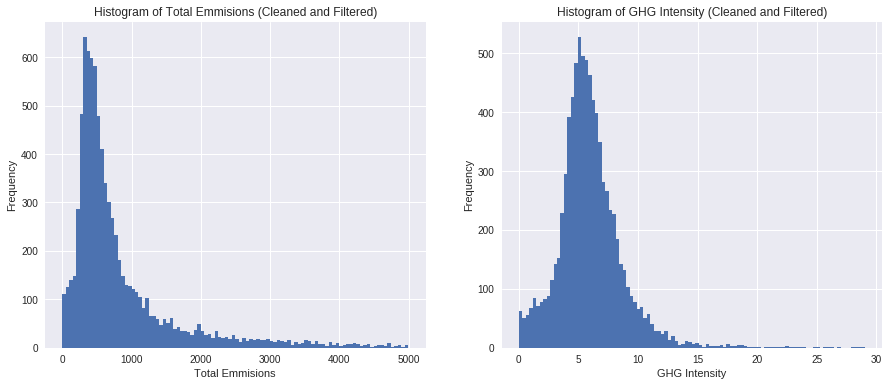

In [1113]:
# Remove outliers and zeros for GHG Intensity
LL84 = LL84[~(LL84['GHG Intensity'] > 30)] 
LL84 = LL84[(LL84['GHG Intensity'] > 0)]

# Remove outliers and zeros for Total GHG Emmisions
LL84 = LL84[~(LL84['Total GHG Emissions(MtCO2e)'] > 5000)] 
LL84 = LL84[(LL84['Total GHG Emissions(MtCO2e)'] > 0)]

#Set total figure size
pl.figure(figsize=(15,6))

# Plot Histogram
pl.subplot(121)
pl.hist(LL84['Total GHG Emissions(MtCO2e)'], bins = 100);

# Format Chart
pl.title("Histogram of Total Emmisions (Cleaned and Filtered)")
pl.xlabel("Total Emmisions")
pl.ylabel("Frequency")

# Plot Histogram
pl.subplot(122)
pl.hist(LL84['GHG Intensity'], bins = 100);

# Format Chart
pl.title("Histogram of GHG Intensity (Cleaned and Filtered)")
pl.xlabel("GHG Intensity")
pl.ylabel("Frequency")

#### Figure 3 and 4:  Histograms of Total Emmisions per building and GHG Intensity per building after data has been cleaned and filtered


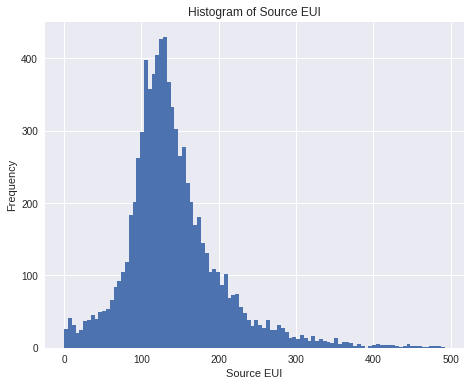

In [1115]:
# Remove outliers and zeros for Source EUI 
LL84 = LL84[~(LL84['Source EUI(kBtu/ft2)'] > 500)] 
LL84 = LL84[(LL84['Source EUI(kBtu/ft2)'] > 0)]

#Set total figure size
pl.figure(figsize=(7.5,6))

# Plot histogram of Total Emmisions
pl.hist(LL84['Source EUI(kBtu/ft2)'], bins = 100)

# Format Chart
pl.title("Histogram of Source EUI")
pl.xlabel("Source EUI")
pl.ylabel("Frequency")

#### Figure 5: Histogram of Source EUI after data has been filtered

In [1116]:
LL84.shape

(8274, 13)

In [1117]:
LL84.describe()

,BBL,Postcode,Site EUI(kBtu/ft2),Source EUI(kBtu/ft2),Total GHG Emissions(MtCO2e),Floor_Area(ft2),Community Board,Council District,Census Tract,GHG Intensity,num_boro
count,8.274000e+03,8274.000000,8274.000000,8274.000000,8274.000000,8.274000e+03,8274.000000,8274.000000,8274.000000,8274.000000,8274.000000
mean,1.784653e+09,10413.616993,86.573955,141.845722,828.944368,1.436228e+05,7.210539,15.951172,4949.095842,5.898378,1.760334
std,9.455321e+08,491.384782,36.184497,63.058065,807.430194,1.372166e+05,3.960906,15.679625,13357.323898,2.542390,0.932105
min,1.000088e+09,10001.000000,0.000000,0.100000,0.100000,4.966000e+03,1.000000,1.000000,1.000000,0.001359,1.000000
25%,1.011990e+09,10022.000000,67.400000,105.800000,361.825000,6.724275e+04,4.000000,4.000000,100.000000,4.435971,1.000000
50%,1.021390e+09,10069.000000,84.900000,131.600000,542.800000,9.450200e+04,7.000000,9.000000,203.000000,5.658691,1.000000
75%,3.002158e+09,10472.000000,104.100000,166.775000,945.975000,1.587295e+05,10.000000,33.000000,525.750000,7.159044,3.000000
max,5.079910e+09,11694.000000,341.000000,492.000000,4996.100000,2.982886e+06,56.000000,51.000000,117602.000000,28.023333,5.000000


There were several major outliers causing the shift, as we have reduced the data by +- 1200 data points and the mean and standard deviation have dropped significantly. 

### Pluto

In [1119]:
# Read in each data set
# plutoMN = pd.read_csv('/wingrdp/homedirs/adn323/CAUI2017_adn323/Data/Pluto_2014/MN.csv')
# plutoBK = pd.read_csv('/wingrdp/homedirs/adn323/CAUI2017_adn323/Data/Pluto_2014/BK.csv')
# plutoBX = pd.read_csv('/wingrdp/homedirs/adn323/CAUI2017_adn323/Data/Pluto_2014/BX.csv')
# plutoQN = pd.read_csv('/wingrdp/homedirs/adn323/CAUI2017_adn323/Data/Pluto_2014/QN.csv')
# plutoSI = pd.read_csv('/wingrdp/homedirs/adn323/CAUI2017_adn323/Data/Pluto_2014/SI.csv')

plutoMN = pd.read_csv('MN.csv')
plutoBK = pd.read_csv('BK.csv')
plutoBX = pd.read_csv('BX.csv')
plutoQN = pd.read_csv('QN.csv')
plutoSI = pd.read_csv('SI.csv')

In [1120]:
# Concatenate PLUTO data from each of 5 borough into single dataset
pluto = pd.concat([plutoBK, plutoBX, plutoMN, plutoQN, plutoSI]).reset_index()
pluto.shape

(858914, 84)

In [1121]:
# Visualise Data as table
pluto.head()

,index,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,...,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,Version
0,0,BK,1,1,302,21.0,2000.0,13.0,33.0,11201.0,...,196222.0,12d,NaN,302 007,30101.0,NaN,3.000010e+09,11/26/2013,1,14v2
1,1,BK,1,2,302,21.0,2000.0,13.0,33.0,11201.0,...,NaN,12d,NaN,300 000,30101.0,NaN,3.000010e+09,11/26/2013,1,14v2
2,2,BK,1,50,302,21.0,2000.0,13.0,33.0,11201.0,...,195989.0,12d,NaN,302 007,30101.0,E-231,0.000000e+00,NaN,1,14v2
3,3,BK,3,1,302,21.0,3002.0,13.0,33.0,11201.0,...,196151.0,12d,NaN,302 007,30101.0,NaN,0.000000e+00,NaN,1,14v2
4,4,BK,3,5,302,21.0,NaN,13.0,33.0,11201.0,...,NaN,12d,NaN,302 007,30101.0,NaN,0.000000e+00,NaN,4,14v2


In [1122]:
pluto.columns

Index([u'index', u'Borough', u'Block', u'Lot', u'CD', u'CT2010', u'CB2010',
       u'SchoolDist', u'Council', u'ZipCode', u'FireComp', u'PolicePrct',
       u'HealthArea', u'Address', u'ZoneDist1', u'ZoneDist2', u'ZoneDist3',
       u'ZoneDist4', u'Overlay1', u'Overlay2', u'SPDist1', u'SPDist2',
       u'LtdHeight', u'AllZoning1', u'AllZoning2', u'SplitZone', u'BldgClass',
       u'LandUse', u'Easements', u'OwnerType', u'OwnerName', u'LotArea',
       u'BldgArea', u'ComArea', u'ResArea', u'OfficeArea', u'RetailArea',
       u'GarageArea', u'StrgeArea', u'FactryArea', u'OtherArea', u'AreaSource',
       u'NumBldgs', u'NumFloors', u'UnitsRes', u'UnitsTotal', u'LotFront',
       u'LotDepth', u'BldgFront', u'BldgDepth', u'Ext', u'ProxCode',
       u'IrrLotCode', u'LotType', u'BsmtCode', u'AssessLand', u'AssessTot',
       u'ExemptLand', u'ExemptTot', u'YearBuilt', u'BuiltCode', u'YearAlter1',
       u'YearAlter2', u'HistDist', u'Landmark', u'BuiltFAR', u'ResidFAR',
       u'CommFAR', u'Fac

In [1123]:
# Drop irrelevant columns from Data set
pluto.drop(['index', 'Block', 'Lot',
            'SchoolDist', 'FireComp', 'PolicePrct',
            'HealthArea', 'Address', 'ZoneDist1', 'ZoneDist2', 'ZoneDist3',
            'ZoneDist4', 'Overlay1', 'Overlay2', 'SPDist1', 'SPDist2',
            'LtdHeight', 'AllZoning1', 'AllZoning2', 'SplitZone', 'BldgClass',
            'LandUse', 'Easements', 'OwnerType', 'OwnerName', 'ComArea', 
            'ResArea', 'OfficeArea', 'RetailArea','GarageArea', 'StrgeArea', 
            'FactryArea', 'OtherArea', 'AreaSource', 'LotFront',
            'LotDepth', 'BldgFront', 'BldgDepth', 'Ext', 'ProxCode',
            'IrrLotCode', 'LotType', 'BsmtCode', 'AssessLand', 'AssessTot',
            'ExemptLand', 'ExemptTot', 'HistDist', 'Landmark', 'BuiltFAR', 'ResidFAR',
            'CommFAR', 'FacilFAR', 'BoroCode', 'CondoNo',
            'XCoord', 'YCoord', 'ZoneMap', 'ZMCode', 'Sanborn', 'TaxMap',
            'EDesigNum', 'APPBBL', 'APPDate', 'PLUTOMapID', 'Version'],
           axis=1,inplace=True)

In [1124]:
# Confirm data types and see if any need to be changed
pluto.dtypes

Borough        object
CD              int64
CT2010        float64
CB2010        float64
Council       float64
ZipCode       float64
LotArea         int64
BldgArea        int64
NumBldgs        int64
NumFloors     float64
UnitsRes        int64
UnitsTotal      int64
YearBuilt       int64
BuiltCode      object
YearAlter1      int64
YearAlter2      int64
BBL             int64
Tract2010       int64
dtype: object

In [1125]:
# Drop NaN's where necessary
pluto = pluto.dropna(subset=["ZipCode"])

# Ensure Data in correct format for merging and processing
pluto.ZipCode = pluto.ZipCode.astype(int)


In [1126]:
pluto.head()

,Borough,CD,CT2010,CB2010,Council,ZipCode,LotArea,BldgArea,NumBldgs,NumFloors,UnitsRes,UnitsTotal,YearBuilt,BuiltCode,YearAlter1,YearAlter2,BBL,Tract2010
0,BK,302,21.0,2000.0,33.0,11201,151930,0,0,0.0,0,0,0,NaN,0,0,3000010001,21
1,BK,302,21.0,2000.0,33.0,11201,9620,123199,1,12.0,42,44,2014,NaN,2014,0,3000010002,21
2,BK,302,21.0,2000.0,33.0,11201,19682,154400,1,9.0,0,90,1920,E,1994,2007,3000010050,21
3,BK,302,21.0,3002.0,33.0,11201,387060,0,10,0.0,0,0,0,NaN,0,0,3000030001,21
4,BK,302,21.0,NaN,33.0,11201,0,0,0,0.0,0,0,0,NaN,0,0,3000030005,21


In [1127]:
pluto.describe()

,CD,CT2010,CB2010,Council,ZipCode,LotArea,BldgArea,NumBldgs,NumFloors,UnitsRes,UnitsTotal,YearBuilt,YearAlter1,YearAlter2,BBL,Tract2010
count,854357.000000,852994.000000,836402.000000,853841.000000,854357.000000,8.543570e+05,8.543570e+05,854357.000000,854357.000000,854357.000000,854357.000000,854357.000000,854357.000000,854357.000000,8.543570e+05,854357.000000
mean,353.941081,462.598839,2056.101986,32.050819,11012.847291,7.235805e+03,6.352442e+03,1.252186,2.312614,4.088092,4.454350,1850.084479,184.942888,27.188331,3.511191e+09,9282.719017
std,100.843802,376.605827,1154.370412,13.242253,471.005825,2.902113e+05,8.441496e+04,4.141107,1.888186,41.507197,44.144829,409.840531,578.887928,231.824903,1.030394e+09,26312.222901
min,101.000000,1.000000,1.000000,1.000000,10001.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000010e+09,0.000000
25%,306.000000,NaN,NaN,NaN,10466.000000,2.000000e+03,1.462000e+03,1.000000,2.000000,1.000000,1.000000,1920.000000,0.000000,0.000000,3.030930e+09,208.000000
50%,401.000000,NaN,NaN,NaN,11221.000000,2.514000e+03,2.100000e+03,1.000000,2.000000,2.000000,2.000000,1930.000000,0.000000,0.000000,4.008280e+09,485.000000
75%,412.000000,NaN,NaN,NaN,11370.000000,4.000000e+03,3.148000e+03,1.000000,2.500000,2.000000,2.000000,1955.000000,0.000000,0.000000,4.105720e+09,1122.000000
max,595.000000,1621.000000,9003.000000,51.000000,11697.000000,2.147557e+08,4.954783e+07,2740.000000,119.000000,13480.000000,13495.000000,2040.000000,2014.000000,2014.000000,5.080500e+09,157903.000000


There is not much we will do with the Pluto data, apart from potentially using it to add regressors to a model. This can be revisited later.

### ACS Data

In [1128]:
#ACSdem = pd.read_excel('/wingrdp/homedirs/adn323/CAUI2017_adn323'\
#                       '/Data/dem_2014acs5yr_nta.xlsx')
ACSdem = pd.read_excel('dem_2014acs5yr_nta.xlsx')
ACSdem.head()

,GeoType,GeogName,GeoID,Borough,Pop1E,Pop1M,Pop1C,Pop1P,Pop1Z,MaleE,...,AsnOAsnE,AsnOAsnM,AsnOAsnC,AsnOAsnP,AsnOAsnZ,AsnOAsnNSE,AsnOAsnNSM,AsnOAsnNSC,AsnOAsnNSP,AsnOAsnNSZ
0,NTA2010,Brooklyn Heights-Cobble Hill,BK09,Brooklyn,23532.0,1028.0,2.7,100.0,NaN,11534.0,...,86.0,75.0,52.7,4.6,3.9,6.0,12.0,121.6,0.3,0.6
1,NTA2010,Sheepshead Bay-Gerritsen Beach-Manhattan Beach,BK17,Brooklyn,63459.0,1643.0,1.6,100.0,NaN,29456.0,...,113.0,88.0,47.4,1.2,0.9,21.0,31.0,89.7,0.2,0.3
2,NTA2010,Brighton Beach,BK19,Brooklyn,33146.0,1379.0,2.5,100.0,NaN,15538.0,...,170.0,141.0,50.4,3.4,2.7,55.0,45.0,49.5,1.1,0.9
3,NTA2010,Seagate-Coney Island,BK21,Brooklyn,29229.0,1287.0,2.7,100.0,NaN,13697.0,...,53.0,86.0,98.6,1.6,2.5,0.0,NaN,NaN,NaN,NaN
4,NTA2010,West Brighton,BK23,Brooklyn,14977.0,647.0,2.6,100.0,NaN,6178.0,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [1129]:
# Extract only total population per NTA and error
ACSdem = ACSdem[['GeogName', 'Borough', 'Pop1E', 'Pop1M']]

# Rename Columns to actual name
ACSdem.rename(columns={'Pop1E':'Population','Pop1M':'PopulationError'},inplace=True)

# Review new data
ACSdem.head()

,GeogName,Borough,Population,PopulationError
0,Brooklyn Heights-Cobble Hill,Brooklyn,23532.0,1028.0
1,Sheepshead Bay-Gerritsen Beach-Manhattan Beach,Brooklyn,63459.0,1643.0
2,Brighton Beach,Brooklyn,33146.0,1379.0
3,Seagate-Coney Island,Brooklyn,29229.0,1287.0
4,West Brighton,Brooklyn,14977.0,647.0


In [1130]:
# Drop NaN from Population data so we can plot histogram
ACSdem.dropna(subset=["Population"],inplace=True)

# Review Statistics of Data
ACSdem.describe()

,Population,PopulationError
count,189.000000,189.000000
mean,44184.566138,1558.285714
std,22031.426621,494.541904
min,8430.000000,536.000000
25%,27264.000000,1219.000000
50%,38793.000000,1477.000000
75%,55450.000000,1835.000000
max,136740.000000,3163.000000


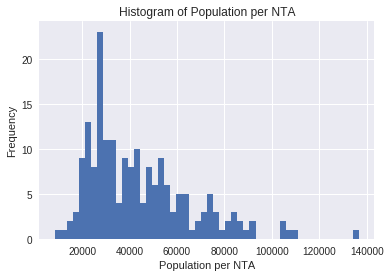

In [1131]:
# Plot Histogram
pl.hist(ACSdem['Population'], bins = 50);

# Format Chart
pl.title("Histogram of Population per NTA")
pl.xlabel("Population per NTA")
pl.ylabel("Frequency")

#### Figure 6: Histogram of Population per NTA
Note there is a clear distribvution with some outliers in the high end of the spectrum, which is to be expected with population data with vastly differing size NTAs

In [1132]:
#ACSincome = pd.read_excel('/wingrdp/homedirs/adn323/CAUI2017_adn323'\
#                          '/Data/econ_2014acs5yr_nta.xlsx')
ACSincome = pd.read_excel('econ_2014acs5yr_nta.xlsx')
ACSincome.head()

,GeoType,GeogName,GeoID,Borough,Pop16plE,Pop16plM,Pop16plC,Pop16plP,Pop16plZ,LFE,...,Pv400t499E,Pv400t499M,Pv400t499C,Pv400t499P,Pv400t499Z,Pv500plE,Pv500plM,Pv500plC,Pv500plP,Pv500plZ
0,NTA2010,Brooklyn Heights-Cobble Hill,BK09,Brooklyn,20708.0,797.0,2.3,100.0,NaN,14411.0,...,1480.0,300.0,12.3,6.7,1.3,13769.0,863.0,3.8,62.4,2.7
1,NTA2010,Sheepshead Bay-Gerritsen Beach-Manhattan Beach,BK17,Brooklyn,52742.0,1311.0,1.5,100.0,NaN,30775.0,...,6636.0,652.0,6.0,10.5,1.0,18574.0,1031.0,3.4,29.3,1.4
2,NTA2010,Brighton Beach,BK19,Brooklyn,27887.0,1028.0,2.2,100.0,NaN,14829.0,...,2145.0,382.0,10.8,6.5,1.1,7885.0,724.0,5.6,23.9,2.0
3,NTA2010,Seagate-Coney Island,BK21,Brooklyn,23663.0,968.0,2.5,100.0,NaN,11703.0,...,1730.0,359.0,12.6,6.0,1.2,3030.0,446.0,9.0,10.6,1.5
4,NTA2010,West Brighton,BK23,Brooklyn,13921.0,603.0,2.6,100.0,NaN,7277.0,...,1475.0,344.0,14.2,9.8,2.3,4406.0,619.0,8.5,29.4,3.9


In [1133]:
# Organise Data set into only relevant Columns
ACSincome = ACSincome[[ 'GeogName', 'Borough','HHE','HHM','MdHHIncE',
                       'MdHHIncM','MnHHIncE','MnHHIncM']]

# Rename Columns to make sense
ACSincome.rename(columns={'HHE':'Households','HHM':'HouseholdsError',
                          'MdHHIncE':'MedianIncome',
                          'MdHHIncM':'MedianIncomeError',
                          'MnHHIncE':'MeanIncome',
                          'MnHHIncM':'MeanIncomeError'},inplace=True)

# Review
ACSincome.head()

,GeogName,Borough,Households,HouseholdsError,MedianIncome,MedianIncomeError,MeanIncome,MeanIncomeError
0,Brooklyn Heights-Cobble Hill,Brooklyn,11036.0,342.0,105398.0,11314.0,169555.0,7940.0
1,Sheepshead Bay-Gerritsen Beach-Manhattan Beach,Brooklyn,25805.0,397.0,51314.0,4781.0,71041.0,1627.0
2,Brighton Beach,Brooklyn,14145.0,336.0,30872.0,4099.0,59875.0,2374.0
3,Seagate-Coney Island,Brooklyn,10864.0,289.0,23229.0,2901.0,43234.0,2059.0
4,West Brighton,Brooklyn,8116.0,214.0,38047.0,4163.0,53608.0,3676.0


In [1134]:
# Drop NaN from Population data so we can plot histogram
ACSincome.dropna(subset=["Households",'MedianIncome'],inplace=True)

# Review Statistics of Data
ACSincome.describe()

,Households,HouseholdsError,MedianIncome,MedianIncomeError,MeanIncome,MeanIncomeError
count,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,16462.420213,332.212766,57002.489362,5293.707447,77808.877660,3172.984043
std,9239.891603,168.593228,24341.286390,2378.883384,38791.512605,1701.817963
min,5559.000000,118.000000,20334.000000,1670.000000,29720.000000,914.000000
25%,9966.000000,236.750000,39015.000000,3482.250000,54656.750000,1881.500000
50%,13940.000000,289.500000,53114.500000,4763.000000,70396.000000,2625.500000
75%,19989.500000,363.500000,71430.750000,6763.000000,89989.500000,4159.250000
max,66482.000000,1222.000000,155213.000000,13497.000000,311109.000000,9625.000000


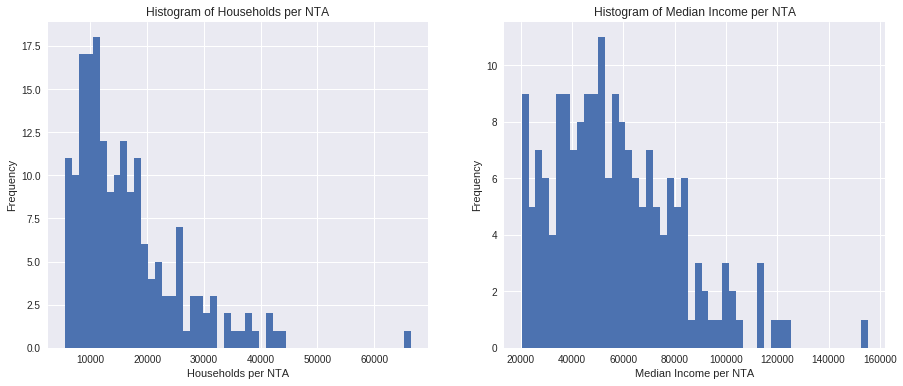

In [1135]:
#Set total figure size
pl.figure(figsize=(15,6))

# Plot Household Histogram
pl.subplot(121) 
pl.hist(ACSincome['Households'], bins = 50);

# Format Chart
pl.title("Histogram of Households per NTA")
pl.xlabel("Households per NTA")
pl.ylabel("Frequency")

# Plot Median Income Histogram
pl.subplot(122) 
pl.hist(ACSincome['MedianIncome'], bins = 50);

# Format Chart
pl.title("Histogram of Median Income per NTA")
pl.xlabel("Median Income per NTA")
pl.ylabel("Frequency")

#### Figure 7 and 8: Histograms of Households per NTA and Median Income per NTA
Note that there is a clear normal distribution with no zero values for both. There are some clear outliers, but upon further inspection these can be confirmed as actual values for data sets. (Carnegie Hill for Income and Upper West Side for Households). We therefore do not want to remove or filter out any data. 

We will need to get Population and Income data per Zip Code for the Asthma Analysis, however when looking at income and emmission we can use this data in its raw form and combine it with the Local Law 84 data by NTA 

In [1136]:
# Merge Zip Code data with NTA data to determine population and income per Zip
LL84Pop = pd.merge(LL84,ACSdem,left_on="NTA",right_on="GeogName")
LL84PopIncome = pd.merge(LL84Pop,ACSincome,left_on="NTA",right_on="GeogName")

# Remove irrelavannt columns for easy processing
temp = LL84PopIncome.groupby(['Postcode',
                              'NTA'])['Population','PopulationError',
                                      'Households','HouseholdsError',
                                      'MedianIncome','MedianIncomeError',
                                      'MeanIncome',
                                      'MeanIncomeError'].mean().reset_index()

In [1137]:
temp.head()

,Postcode,NTA,Population,PopulationError,Households,HouseholdsError,MedianIncome,MedianIncomeError,MeanIncome,MeanIncomeError
0,10001,Midtown-Midtown South,28305.0,1219.0,15944.0,545.0,114491.0,11607.0,184315.0,5466.0
1,10002,Chinatown,45091.0,1681.0,17922.0,436.0,35908.0,4129.0,62270.0,2388.0
2,10002,Lower East Side,74835.0,2204.0,30853.0,430.0,31273.0,2575.0,61257.0,1553.0
3,10003,East Village,43402.0,1488.0,22326.0,552.0,72665.0,5718.0,100130.0,3751.0
4,10003,Gramercy,27396.0,1210.0,14734.0,506.0,100900.0,9088.0,148602.0,7956.0


In [1138]:
# Create Population by Zip dataframe
ZipPop = pd.DataFrame(temp.groupby(['Postcode'])['Population','Households'].sum()).reset_index()
ZipPop.rename(columns={'Population':'TotPop','Households':'TotHH'},inplace=True)
ZipPop.head()

,Postcode,TotPop,TotHH
0,10001,28305.0,15944.0
1,10002,119926.0,48775.0
2,10003,138319.0,74661.0
3,10004,42485.0,21216.0
4,10005,42485.0,21216.0


In [1139]:
# Create Income by Zip Data Frame
# Obviously we cannot actually determine the median from multiple data sets,
# However, as an approximation we will average median incomes for NTA's in same 
# Zip, assuming that the difference is not that big (although occasionally it is)

# Merge data total population and household data to weight median income
temp = pd.merge(temp,ZipPop,on='Postcode')

# Create new column that determines weighted median income
temp['WeightedMedianIncome'] = temp['MedianIncome'] * temp['Households'] / temp['TotHH']

# Create new data frame for weighted median income by Zip
ZipIncome = pd.DataFrame(temp.groupby(['Postcode'])['WeightedMedianIncome'].sum()).reset_index()
ZipIncome.head()

,Postcode,WeightedMedianIncome
0,10001,114491.000000
1,10002,32976.095233
2,10003,98394.054178
3,10004,125434.000000
4,10005,125434.000000


In [1140]:
# Merge Data sets into 1
ZipPopIncome = pd.merge(ZipPop,ZipIncome,on="Postcode")
ZipPopIncome.Postcode = ZipPopIncome.Postcode.astype(int) # convert to integers
ZipPopIncome.head()

,Postcode,TotPop,TotHH,WeightedMedianIncome
0,10001,28305.0,15944.0,114491.000000
1,10002,119926.0,48775.0,32976.095233
2,10003,138319.0,74661.0,98394.054178
3,10004,42485.0,21216.0,125434.000000
4,10005,42485.0,21216.0,125434.000000


### Asthma

In [1141]:
# Asthma = pd.read_csv('/wingrdp/homedirs/adn323/CAUI2017_adn323/Data/asthma.csv')
Asthma = pd.read_csv('asthma.csv')
Asthma.head()

,Unnamed: 0,index,Zip Code,Discharges 2012-2014,Discharge Rate
0,0,2,10001,159,21.9
1,1,3,10002,592,23.9
2,2,4,10003,130,7.7
3,3,5,10004,s,s
4,4,6,10005*,6,2.2


In [1142]:
Asthma.shape

(181, 5)

In [1143]:
Asthma.dtypes

Unnamed: 0               int64
index                    int64
Zip Code                object
Discharges 2012-2014    object
Discharge Rate          object
dtype: object

In [1144]:
# Convert data types to numbers and clean data
Asthma['Discharges 2012-2014'] = pd.to_numeric(Asthma['Discharges 2012-2014'], errors='coerce')
Asthma['DischargeRate'] = pd.to_numeric(Asthma['Discharge Rate'], errors='coerce')
Asthma['Zip Code'] = pd.to_numeric(Asthma['Zip Code'], errors='coerce')

# Drop NA Zip Codes
Asthma.dropna(subset=["Zip Code"],inplace=True)
Asthma['Zip Code'] = Asthma['Zip Code'].astype(int)

# Remove data below 10 as error is too high then and these will be negligible
Asthma = Asthma[~(Asthma['Discharges 2012-2014'] <= 10)] 
Asthma.dropna(subset=["Discharges 2012-2014"],inplace=True) # remove NaN
Asthma.drop(['Unnamed: 0','index','Discharge Rate'],axis=1,inplace=True)

In [1145]:
Asthma.head()

,Zip Code,Discharges 2012-2014,DischargeRate
0,10001,159.0,21.9
1,10002,592.0,23.9
2,10003,130.0,7.7
6,10007,14.0,2.9
7,10009,534.0,28.3


In [1146]:
print(Asthma.shape)
Asthma.dtypes

(172, 3)


Zip Code                  int64
Discharges 2012-2014    float64
DischargeRate           float64
dtype: object

In [1147]:
Asthma.describe()

,Zip Code,Discharges 2012-2014,DischargeRate
count,172.000000,172.000000,172.000000
mean,10831.203488,394.145349,24.751744
std,571.923143,410.374479,18.592907
min,10001.000000,13.000000,2.900000
25%,10304.750000,112.000000,11.675000
50%,11203.500000,246.000000,18.950000
75%,11362.250000,515.750000,31.300000
max,11697.000000,1999.000000,94.800000


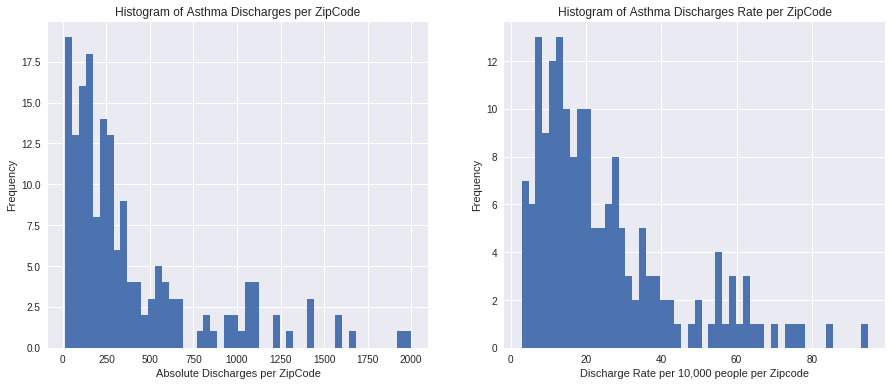

In [1148]:
#Set total figure size
pl.figure(figsize=(15,6))

# Plot Histogram of Asthma Discharges
pl.subplot(121)
pl.hist(Asthma['Discharges 2012-2014'], bins = 50);

# Format Chart
pl.title("Histogram of Asthma Discharges per ZipCode")
pl.xlabel("Absolute Discharges per ZipCode")
pl.ylabel("Frequency")

# Plot Histogram of Asthma Discharges Rate
pl.subplot(122)
pl.hist(Asthma['DischargeRate'], bins = 50);

# Format Chart
pl.title("Histogram of Asthma Discharges Rate per ZipCode")
pl.xlabel("Discharge Rate per 10,000 people per Zipcode")
pl.ylabel("Frequency")

#### Figure 9 and 10: Histogram of Absolute Discharges per Zipcode and Discharge Rate per 10000 people between 2012 and 2014 for Asthma
Note how the bulk of the data falls below 500, however there are several zipcodes which appear to be outliers. However, we will not remove this data as it will exclude Zipcodes from analysis and this is already aggregated and cleaned data. Similarly the bulk of the rate data falls below 40 discharges per 10,000 people per Zipcode, with some outliers. These may be very poorly performing Zipcodes. 

# Merging Data

### Asthma Data and Local Law 84 Data
To measure Emmisions against Asthma related discharges 

In [1149]:
# Group Local Law 84 data by Zip code for merging, averaging emmisions per zip
LL84zip = LL84.groupby(['Postcode']).median().reset_index()
LL84zip = LL84zip[['Postcode','Total GHG Emissions(MtCO2e)','GHG Intensity']] # Force only useful data

# Group Local Law 84 data by Zip Code for merging, sum emission per zip
LL84totzip = LL84.groupby(['Postcode']).sum().reset_index()
LL84totzip = LL84zip[['Postcode','Total GHG Emissions(MtCO2e)','GHG Intensity']] # Force only useful data

# Rename tables and merge
LL84zip.rename(columns={'GHG Intensity':'MedGHGIntensity','Total GHG Emissions(MtCO2e)':'MedTotalGHG'},inplace=True)
LL84totzip.rename(columns={'GHG Intensity':'AbsGHGIntensity','Total GHG Emissions(MtCO2e)':'AbsTotalGHG'},inplace=True)
LL84zip = pd.merge(LL84zip,LL84totzip,on='Postcode')

# Display useful info of new grouped data
print(LL84zip.shape)
LL84zip.head()

(135, 5)


,Postcode,MedTotalGHG,MedGHGIntensity,AbsTotalGHG,AbsGHGIntensity
0,10001,582.40,5.625834,582.40,5.625834
1,10002,935.70,5.733078,935.70,5.733078
2,10003,645.15,6.252418,645.15,6.252418
3,10004,2269.70,7.348999,2269.70,7.348999
4,10005,2000.70,5.666636,2000.70,5.666636


In [1150]:
EmmsAsthma = pd.merge(LL84zip,Asthma,left_on="Postcode", right_on="Zip Code")
EmmsAsthma.head()

,Postcode,MedTotalGHG,MedGHGIntensity,AbsTotalGHG,AbsGHGIntensity,Zip Code,Discharges 2012-2014,DischargeRate
0,10001,582.40,5.625834,582.40,5.625834,10001,159.0,21.9
1,10002,935.70,5.733078,935.70,5.733078,10002,592.0,23.9
2,10003,645.15,6.252418,645.15,6.252418,10003,130.0,7.7
3,10007,737.50,5.745778,737.50,5.745778,10007,14.0,2.9
4,10009,492.50,5.357384,492.50,5.357384,10009,534.0,28.3


In [1151]:
# Merge Population and Income data with Astjma and Emmisions data
Mergeddf = pd.merge(EmmsAsthma,ZipPopIncome,on='Postcode')

# Drop redundant columns
Mergeddf.drop(['Zip Code'],axis=1,inplace=True)

# Review data
Mergeddf.head()

,Postcode,MedTotalGHG,MedGHGIntensity,AbsTotalGHG,AbsGHGIntensity,Discharges 2012-2014,DischargeRate,TotPop,TotHH,WeightedMedianIncome
0,10001,582.40,5.625834,582.40,5.625834,159.0,21.9,28305.0,15944.0,114491.000000
1,10002,935.70,5.733078,935.70,5.733078,592.0,23.9,119926.0,48775.0,32976.095233
2,10003,645.15,6.252418,645.15,6.252418,130.0,7.7,138319.0,74661.0,98394.054178
3,10007,737.50,5.745778,737.50,5.745778,14.0,2.9,84567.0,40977.0,122297.953364
4,10009,492.50,5.357384,492.50,5.357384,534.0,28.3,118237.0,53179.0,48650.494725


In [1152]:
# Write data to csv to be used in Carto (external mapping software)
Mergeddf.to_csv('AsthmaVSEmissions.csv')

### Residential Energy Usage Data and Income Data

In [1153]:
LL84.columns

Index([u'BBL', u'Postcode', u'Site EUI(kBtu/ft2)', u'Source EUI(kBtu/ft2)',
       u'Total GHG Emissions(MtCO2e)', u'Floor_Area(ft2)',
       u'Primary Property Type - Self Selected', u'Community Board',
       u'Council District', u'Census Tract', u'NTA', u'GHG Intensity',
       u'num_boro'],
      dtype='object')

In [1154]:
# Group Local Law 84 data by Zip code for merging, averaging emmisions per zip
ResLL84zip = LL84[LL84['Primary Property Type - Self Selected'] == 'Multifamily Housing']\
                        .groupby(['Postcode']).median().reset_index()
ResLL84zip = ResLL84zip[['Postcode','Total GHG Emissions(MtCO2e)',
                         'GHG Intensity','Site EUI(kBtu/ft2)','Source EUI(kBtu/ft2)']] # Force only useful data


# Rename tables and merge
ResLL84zip.rename(columns={'GHG Intensity':'MedGHGIntensity',
                           'Total GHG Emissions(MtCO2e)':'MedTotalGHG',
                           'Site EUI(kBtu/ft2)':'Site_EUI',
                           'Source EUI(kBtu/ft2)':'Source_EUI'},
                  inplace=True)

# Display useful info of new grouped data
print(ResLL84zip.shape)
ResLL84zip.head()

(124, 5)


,Postcode,MedTotalGHG,MedGHGIntensity,Site_EUI,Source_EUI
0,10001,527.60,5.516816,82.4,132.90
1,10002,935.70,5.732546,93.8,141.00
2,10003,647.40,6.408750,89.2,141.20
3,10004,1536.45,6.566398,89.4,166.55
4,10005,2022.75,5.496271,78.0,157.10


In [1155]:
# Merge Population and Income data with Astjma and Emmisions data
EnergyIncome = pd.merge(ResLL84zip,ZipPopIncome,on='Postcode')

# Review data
EnergyIncome.head()

,Postcode,MedTotalGHG,MedGHGIntensity,Site_EUI,Source_EUI,TotPop,TotHH,WeightedMedianIncome
0,10001,527.60,5.516816,82.4,132.90,28305.0,15944.0,114491.000000
1,10002,935.70,5.732546,93.8,141.00,119926.0,48775.0,32976.095233
2,10003,647.40,6.408750,89.2,141.20,138319.0,74661.0,98394.054178
3,10004,1536.45,6.566398,89.4,166.55,42485.0,21216.0,125434.000000
4,10005,2022.75,5.496271,78.0,157.10,42485.0,21216.0,125434.000000


In [1156]:
# Write data to csv to be sued in Carto (external mapping software)
EnergyIncome.to_csv('EnergyUsageVSIncome.csv')

# Building Models and evaluating relationships
### Asthma Data and Local Law 84

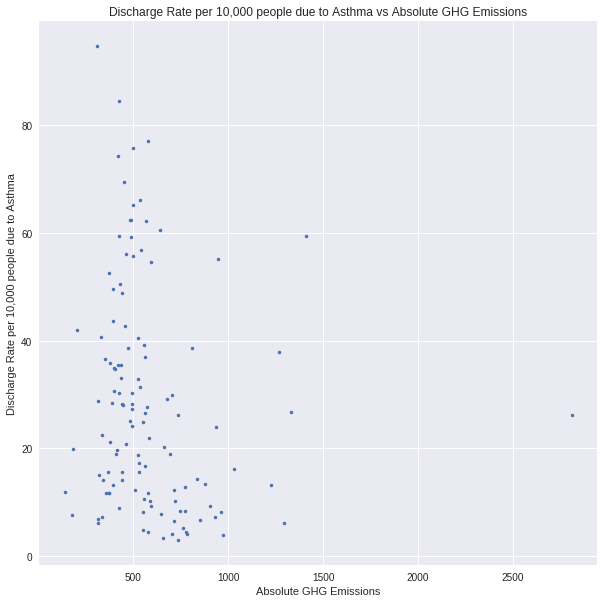

In [1157]:
#Set total figure size
pl.figure(figsize=(10,10))

# Plot Discharge Rate vs GHG Intensity
#pl.plot(Mergeddf['GHG Intensity'],Mergeddf['DischargeRate'],'.', label="Data")
pl.plot(Mergeddf['AbsTotalGHG'],Mergeddf['DischargeRate'],'.', label="Data")

# Format Plot
pl.title("Discharge Rate per 10,000 people due to Asthma vs Absolute GHG Emissions")
pl.xlabel("Absolute GHG Emissions")
pl.ylabel("Discharge Rate per 10,000 people due to Asthma")

#### Figure 11: Discharge Rate Vs Absolute GHG emissions
Note how there appears to be no clear relationship

In [1158]:
GHGDRlm = smf.ols(formula = 'DischargeRate ~ AbsTotalGHG', data = Mergeddf).fit()
GHGDRlm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          DischargeRate   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     2.536
Date:                Tue, 14 Nov 2017   Prob (F-statistic):              0.114
Time:                        07:25:35   Log-Likelihood:                -541.30
No. Observations:                 122   AIC:                             1087.
Df Residuals:                     120   BIC:                             1092.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      33.9456      3.992      8.503      0.000        26.041    41.850
AbsTotalGHG    -0.0096      0.006     -1.593      0.114        -0.022     0.002
==============================================================================
Omnibus:                       15.031   Durbin-Watson:                   1.054
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.442
Skew:                           0.925   Prob(JB):                     0.000163
Kurtosis:                       3.082   Cond. No.                     1.42e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1159]:
GHGDRlm2 = smf.ols(formula = 'DischargeRate ~ AbsTotalGHG -1', data = Mergeddf).fit()
GHGDRlm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          DischargeRate   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     101.0
Date:                Tue, 14 Nov 2017   Prob (F-statistic):           1.21e-17
Time:                        07:25:36   Log-Likelihood:                -570.07
No. Observations:                 122   AIC:                             1142.
Df Residuals:                     121   BIC:                             1145.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
AbsTotalGHG     0.0357      0.004     10.049      0.000         0.029     0.043
==============================================================================
Omnibus:                        3.591   Durbin-Watson:                   0.947
Prob(Omnibus):                  0.166   Jarque-Bera (JB):                3.100
Skew:                           0.281   Prob(JB):                        0.212
Kurtosis:                       3.542   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

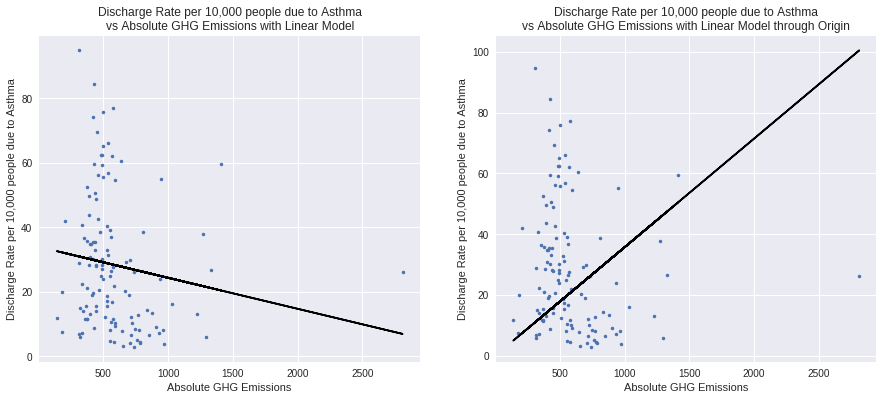

In [1160]:
#Set total figure size
pl.figure(figsize=(15,6))

# Plot Total GHG vs Asthma Discharge Rate with linear model
pl.subplot(121)
pl.plot(Mergeddf['AbsTotalGHG'],Mergeddf['DischargeRate'],'.', label="Data")
pl.plot(Mergeddf['AbsTotalGHG'],GHGDRlm.predict(),'-k', label="Linear Model")

# Format Plot
pl.title("Discharge Rate per 10,000 people due to Asthma"\
         "\nvs Absolute GHG Emissions with Linear Model")
pl.xlabel("Absolute GHG Emissions")
pl.ylabel("Discharge Rate per 10,000 people due to Asthma")

# Plot Total GHG vs Asthma Discharge Rate with linear model through origin
pl.subplot(122)
pl.plot(Mergeddf['AbsTotalGHG'],Mergeddf['DischargeRate'],'.', label="Data")
pl.plot(Mergeddf['AbsTotalGHG'],GHGDRlm2.predict(),'-k', label="Linear Model")

# Format Plot
pl.title("Discharge Rate per 10,000 people due to Asthma"\
         "\nvs Absolute GHG Emissions with Linear Model through Origin")
pl.xlabel("Absolute GHG Emissions")
pl.ylabel("Discharge Rate per 10,000 people due to Asthma")

#### Figure 12 and 13: Dicharge Rate Vs Absiolute GHG emission with linear models with and without intercepts
Note how the models completely inverse with the intercept, suggesting that there is no a good relationship. 

 Now try and log log the data to see if there is a better relationship

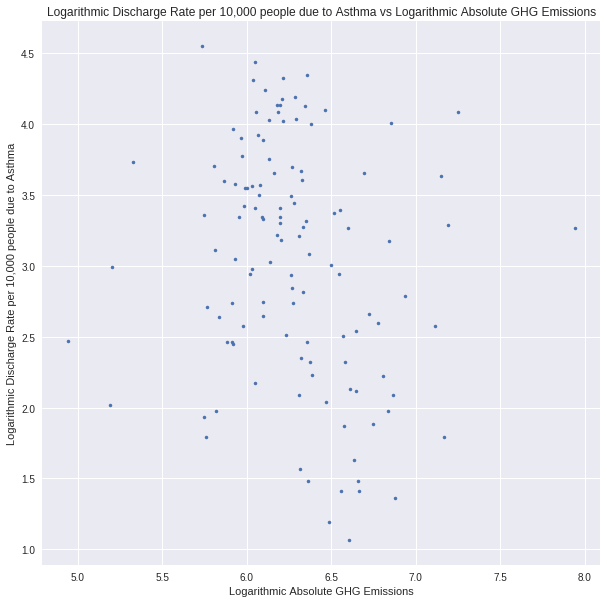

In [1161]:
# Create Logarithmic data
Mergeddf['LogAbsTotalGHG'] = np.log(Mergeddf['AbsTotalGHG'])
Mergeddf['LogDischargeRate'] = np.log(Mergeddf['DischargeRate'])

# Plot Logarithmic data
#Set total figure size
pl.figure(figsize=(10,10))

# Plot Discharge Rate vs GHG Intensity
#pl.plot(Mergeddf['GHG Intensity'],Mergeddf['DischargeRate'],'.', label="Data")
pl.plot(Mergeddf['LogAbsTotalGHG'],Mergeddf['LogDischargeRate'],'.', label="Data")

# Format Plot
pl.title("Logarithmic Discharge Rate per 10,000 people due to Asthma vs Logarithmic Absolute GHG Emissions")
pl.xlabel("Logarithmic Absolute GHG Emissions")
pl.ylabel("Logarithmic Discharge Rate per 10,000 people due to Asthma")

#### Figure 14: Logarithmic Discharge Rate per 10,000 people due to Asthma vs Logarithmic Absolute GHG Emissions
This does not appear to imporve the relationship

In [1162]:
GHGDRlm = smf.ols(formula = 'LogDischargeRate ~ LogAbsTotalGHG', data = Mergeddf).fit()
GHGDRlm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       LogDischargeRate   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     4.458
Date:                Tue, 14 Nov 2017   Prob (F-statistic):             0.0368
Time:                        07:27:41   Log-Likelihood:                -148.33
No. Observations:                 122   AIC:                             300.7
Df Residuals:                     120   BIC:                             306.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept          5.3789      1.110      4.847      0.000         3.182     7.576
LogAbsTotalGHG    -0.3726      0.176     -2.111      0.037        -0.722    -0.023
==============================================================================
Omnibus:                       10.303   Durbin-Watson:                   1.087
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                5.175
Skew:                          -0.290   Prob(JB):                       0.0752
Kurtosis:                       2.174   Cond. No.                         96.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1163]:
GHGDRlm2 = smf.ols(formula = 'LogDischargeRate ~ LogAbsTotalGHG -1', data = Mergeddf).fit()
GHGDRlm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       LogDischargeRate   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     1389.
Date:                Tue, 14 Nov 2017   Prob (F-statistic):           3.64e-68
Time:                        07:27:42   Log-Likelihood:                -159.23
No. Observations:                 122   AIC:                             320.5
Df Residuals:                     121   BIC:                             323.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
LogAbsTotalGHG     0.4807      0.013     37.267      0.000         0.455     0.506
==============================================================================
Omnibus:                        6.765   Durbin-Watson:                   0.992
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                5.420
Skew:                          -0.412   Prob(JB):                       0.0665
Kurtosis:                       2.378   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

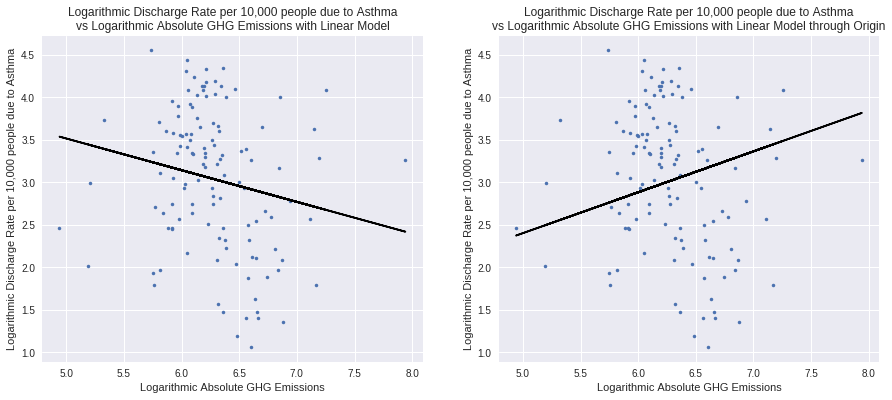

In [1164]:
#Set total figure size
pl.figure(figsize=(15,6))

# Plot Total GHG vs Asthma Discharge Rate with linear model
pl.subplot(121)
pl.plot(Mergeddf['LogAbsTotalGHG'],Mergeddf['LogDischargeRate'],'.', label="Data")
pl.plot(Mergeddf['LogAbsTotalGHG'],GHGDRlm.predict(),'-k', label="Linear Model")

# Format Plot
pl.title("Logarithmic Discharge Rate per 10,000 people due to Asthma"\
         "\nvs Logarithmic Absolute GHG Emissions with Linear Model")
pl.xlabel("Logarithmic Absolute GHG Emissions")
pl.ylabel("Logarithmic Discharge Rate per 10,000 people due to Asthma")

# Plot Total GHG vs Asthma Discharge Rate with linear model through origin
pl.subplot(122)
pl.plot(Mergeddf['LogAbsTotalGHG'],Mergeddf['LogDischargeRate'],'.', label="Data")
pl.plot(Mergeddf['LogAbsTotalGHG'],GHGDRlm2.predict(),'-k', label="Linear Model")

# Format Plot
pl.title("Logarithmic Discharge Rate per 10,000 people due to Asthma"\
         "\nvs Logarithmic Absolute GHG Emissions with Linear Model through Origin")
pl.xlabel("Logarithmic Absolute GHG Emissions")
pl.ylabel("Logarithmic Discharge Rate per 10,000 people due to Asthma")

#### Figure 15 and 16: Logarithmic Discharge Rate per 10,000 people due to Asthma vs Logarithmic Absolute GHG Emissions with linear models with and without an intercept
Again the models do not appear ot be visually strong

In [1165]:
GHGDRqm = smf.ols(formula = 'LogDischargeRate ~ LogAbsTotalGHG + I(LogAbsTotalGHG**2)', data = Mergeddf).fit()
GHGDRqm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       LogDischargeRate   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     2.494
Date:                Tue, 14 Nov 2017   Prob (F-statistic):             0.0868
Time:                        07:28:50   Log-Likelihood:                -148.04
No. Observations:                 122   AIC:                             302.1
Df Residuals:                     119   BIC:                             310.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Intercept                 -0.8514      8.490     -0.100      0.920       -17.662    15.959
LogAbsTotalGHG             1.6001      2.671      0.599      0.550        -3.688     6.888
I(LogAbsTotalGHG ** 2)    -0.1554      0.210     -0.740      0.461        -0.571     0.260
==============================================================================
Omnibus:                        8.992   Durbin-Watson:                   1.090
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                4.725
Skew:                          -0.273   Prob(JB):                       0.0942
Kurtosis:                       2.205   Cond. No.                     4.82e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1166]:
GHGDRqm2 = smf.ols(formula = 'LogDischargeRate ~ LogAbsTotalGHG + I(LogAbsTotalGHG**2) -1', data = Mergeddf).fit()
GHGDRqm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       LogDischargeRate   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     839.3
Date:                Tue, 14 Nov 2017   Prob (F-statistic):           2.86e-71
Time:                        07:28:50   Log-Likelihood:                -148.05
No. Observations:                 122   AIC:                             300.1
Df Residuals:                     120   BIC:                             305.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
LogAbsTotalGHG             1.3328      0.174      7.667      0.000         0.989     1.677
I(LogAbsTotalGHG ** 2)    -0.1346      0.027     -4.913      0.000        -0.189    -0.080
==============================================================================
Omnibus:                        9.236   Durbin-Watson:                   1.089
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                4.801
Skew:                          -0.275   Prob(JB):                       0.0907
Kurtosis:                       2.199   Cond. No.                         95.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:22: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


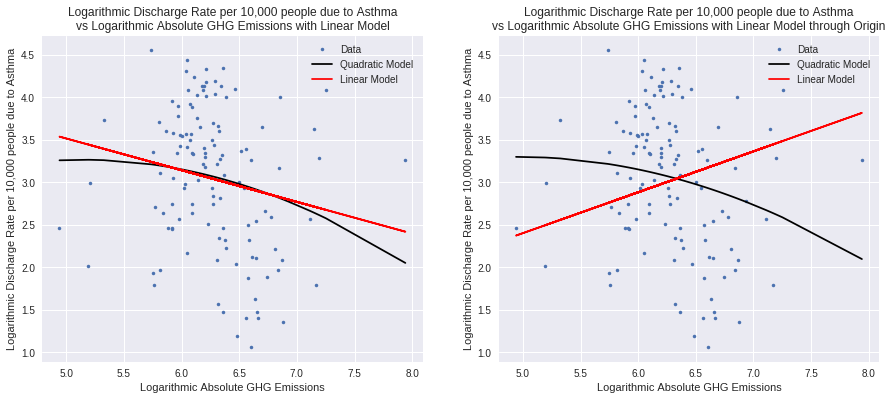

In [1167]:
#Set total figure size
pl.figure(figsize=(15,6))

# Sort Quadratic Model
arr = pd.DataFrame({"Pred":GHGDRqm.predict(),"x":Mergeddf['LogAbsTotalGHG']})
arr = arr.sort("x",ascending=True)

# Plot Total GHG vs Asthma Discharge Rate with linear model
pl.subplot(121)
pl.plot(Mergeddf['LogAbsTotalGHG'],Mergeddf['LogDischargeRate'],'.', label="Data")
pl.plot(arr.x,arr.Pred,'-k', label="Quadratic Model")
pl.plot(Mergeddf['LogAbsTotalGHG'],GHGDRlm.predict(),'-r', label="Linear Model")

# Format Plot
pl.title("Logarithmic Discharge Rate per 10,000 people due to Asthma"\
         "\nvs Logarithmic Absolute GHG Emissions with Linear Model")
pl.xlabel("Logarithmic Absolute GHG Emissions")
pl.ylabel("Logarithmic Discharge Rate per 10,000 people due to Asthma")
pl.legend()

# Sort Quadratic Model
arr = pd.DataFrame({"Pred":GHGDRqm2.predict(),"x":Mergeddf['LogAbsTotalGHG']})
arr = arr.sort("x",ascending=True)

# Plot Total GHG vs Asthma Discharge Rate with linear model through origin
pl.subplot(122)
pl.plot(Mergeddf['LogAbsTotalGHG'],Mergeddf['LogDischargeRate'],'.', label="Data")
pl.plot(arr.x,arr.Pred,'-k', label="Quadratic Model")
pl.plot(Mergeddf['LogAbsTotalGHG'],GHGDRlm2.predict(),'-r', label="Linear Model")

# Format Plot
pl.title("Logarithmic Discharge Rate per 10,000 people due to Asthma"\
         "\nvs Logarithmic Absolute GHG Emissions with Linear Model through Origin")
pl.xlabel("Logarithmic Absolute GHG Emissions")
pl.ylabel("Logarithmic Discharge Rate per 10,000 people due to Asthma")
pl.legend()

#### Figure 17 and 18: Logarithmic Discharge Rate per 10,000 people due to Asthma vs Logarithmic Absolute GHG Emissions with linear and quadratic models with and without an intercept
It is important to note that there does not appear to be a strong visual relationship between the two data sets and this coroborated by the statistical values from the models with low R-squared values and insignificant P-values generally. 

### Residential Energy Usage Data and Income Data

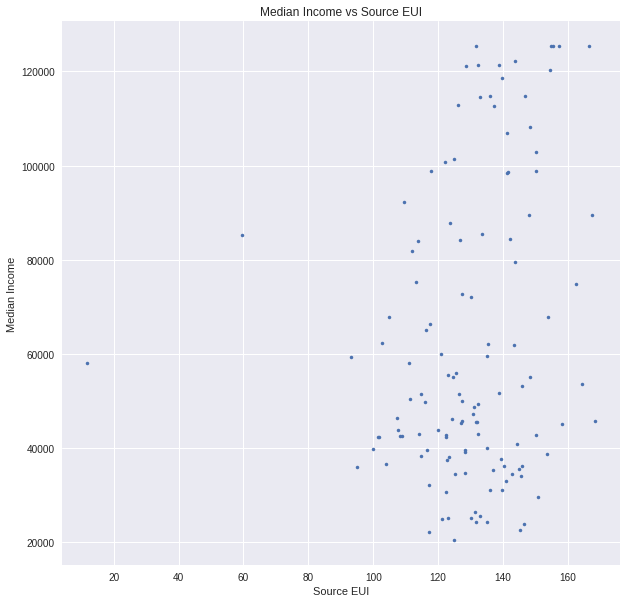

In [1168]:
#Set total figure size
pl.figure(figsize=(10,10))

# Plot Income vs Energy Usage for Residential Units
pl.plot(EnergyIncome['Source_EUI'],EnergyIncome['WeightedMedianIncome'],'.', label="Data")

# Format Plot
pl.title("Median Income vs Source EUI")
pl.xlabel("Source EUI")
pl.ylabel("Median Income")

#### Figure 18: Median Income VS Energy Usage (Source)
Visually it looks like there might be some relationship. Develop models

In [1169]:
IncomeEUIlm = smf.ols(formula = 'WeightedMedianIncome ~ Source_EUI', data = EnergyIncome).fit()
IncomeEUIlm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     WeightedMedianIncome   R-squared:                       0.042
Model:                              OLS   Adj. R-squared:                  0.034
Method:                   Least Squares   F-statistic:                     5.335
Date:                  Tue, 14 Nov 2017   Prob (F-statistic):             0.0226
Time:                          07:31:16   Log-Likelihood:                -1455.2
No. Observations:                   124   AIC:                             2914.
Df Residuals:                       122   BIC:                             2920.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   2.132e+04   1.77e+04      1.201      0.232     -1.38e+04  5.65e+04
Source_EUI   312.6945    135.378      2.310      0.023        44.701   580.688
==============================================================================
Omnibus:                       20.104   Durbin-Watson:                   0.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.672
Skew:                           0.595   Prob(JB):                      0.00292
Kurtosis:                       2.082   Cond. No.                         850.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1170]:
IncomeEUIlm2 = smf.ols(formula = 'WeightedMedianIncome ~ Source_EUI -1', data = EnergyIncome).fit()
IncomeEUIlm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     WeightedMedianIncome   R-squared:                       0.806
Model:                              OLS   Adj. R-squared:                  0.805
Method:                   Least Squares   F-statistic:                     512.5
Date:                  Tue, 14 Nov 2017   Prob (F-statistic):           1.09e-45
Time:                          07:31:18   Log-Likelihood:                -1455.9
No. Observations:                   124   AIC:                             2914.
Df Residuals:                       123   BIC:                             2917.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Source_EUI   473.3344     20.908     22.639      0.000       431.948   514.721
==============================================================================
Omnibus:                       21.545   Durbin-Watson:                   0.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.465
Skew:                           0.523   Prob(JB):                      0.00534
Kurtosis:                       2.035   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

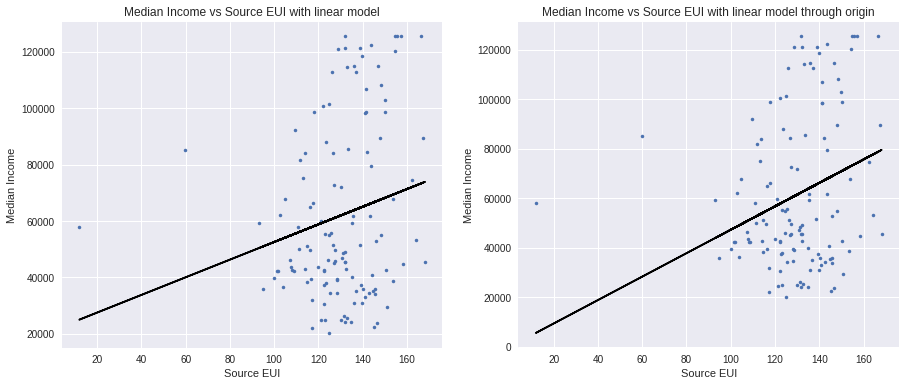

In [1171]:
#Set total figure size
pl.figure(figsize=(15,6))

# Plot Income vs Energy Usage for Residential Units
pl.subplot(121)
pl.plot(EnergyIncome['Source_EUI'],EnergyIncome['WeightedMedianIncome'],'.', label="Data")
pl.plot(EnergyIncome['Source_EUI'],IncomeEUIlm.predict(),'-k', label="Linear Model")

# Format Plot
pl.title("Median Income vs Source EUI with linear model")
pl.xlabel("Source EUI")
pl.ylabel("Median Income")

# Plot Income vs Energy Usage for Residential Units
pl.subplot(122)
pl.plot(EnergyIncome['Source_EUI'],EnergyIncome['WeightedMedianIncome'],'.', label="Data")
pl.plot(EnergyIncome['Source_EUI'],IncomeEUIlm2.predict(),'-k', label="Linear Model")

# Format Plot
pl.title("Median Income vs Source EUI with linear model through origin")
pl.xlabel("Source EUI")
pl.ylabel("Median Income")

#### Figure 19 and 20: Median Income VS Energy Usage with Linear models
The models appear to fit decently and particularly when going through the origin has a good R-squared value. Try make the model more complex to see if we get a better fit. 

In [1172]:
IncomeEUIqm = smf.ols(formula = 'WeightedMedianIncome ~ Source_EUI + I(Source_EUI**2)', data = EnergyIncome).fit()
IncomeEUIqm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     WeightedMedianIncome   R-squared:                       0.075
Model:                              OLS   Adj. R-squared:                  0.059
Method:                   Least Squares   F-statistic:                     4.882
Date:                  Tue, 14 Nov 2017   Prob (F-statistic):            0.00914
Time:                          07:32:50   Log-Likelihood:                -1453.0
No. Observations:                   124   AIC:                             2912.
Df Residuals:                       121   BIC:                             2921.
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept           8.054e+04   3.35e+04      2.401      0.018      1.41e+04  1.47e+05
Source_EUI          -813.2816    560.094     -1.452      0.149     -1922.135   295.572
I(Source_EUI ** 2)     5.0400      2.435      2.070      0.041         0.220     9.860
==============================================================================
Omnibus:                       16.646   Durbin-Watson:                   0.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.096
Skew:                           0.547   Prob(JB):                      0.00642
Kurtosis:                       2.130   Cond. No.                     2.21e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1173]:
IncomeEUIqm2 = smf.ols(formula = 'WeightedMedianIncome ~ Source_EUI + I(Source_EUI**2) -1', data = EnergyIncome).fit()
IncomeEUIqm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     WeightedMedianIncome   R-squared:                       0.806
Model:                              OLS   Adj. R-squared:                  0.803
Method:                   Least Squares   F-statistic:                     254.2
Date:                  Tue, 14 Nov 2017   Prob (F-statistic):           3.11e-44
Time:                          07:32:51   Log-Likelihood:                -1455.9
No. Observations:                   124   AIC:                             2916.
Df Residuals:                       122   BIC:                             2921.
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Source_EUI           465.9893    175.990      2.648      0.009       117.599   814.380
I(Source_EUI ** 2)     0.0545      1.296      0.042      0.967        -2.511     2.620
==============================================================================
Omnibus:                       21.524   Durbin-Watson:                   0.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.403
Skew:                           0.520   Prob(JB):                      0.00551
Kurtosis:                       2.035   Cond. No.                     1.14e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:22: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


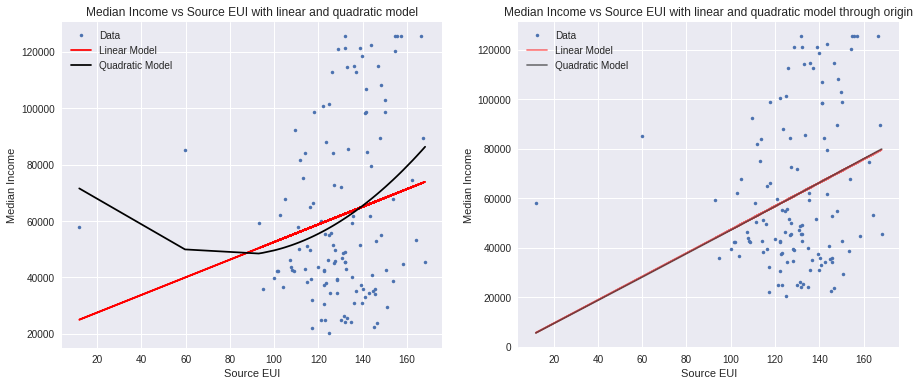

In [1174]:
#Set total figure size
pl.figure(figsize=(15,6))

# Sort Quadratic Model
arr = pd.DataFrame({"Pred":IncomeEUIqm.predict(),"x":EnergyIncome['Source_EUI']})
arr = arr.sort("x",ascending=True)

# Plot Income vs Energy Usage for Residential Units
pl.subplot(121)
pl.plot(EnergyIncome['Source_EUI'],EnergyIncome['WeightedMedianIncome'],'.', label="Data")
pl.plot(EnergyIncome['Source_EUI'],IncomeEUIlm.predict(),'-r', label="Linear Model")
pl.plot(arr.x,arr.Pred,'-k', label="Quadratic Model")

# Format Plot
pl.title("Median Income vs Source EUI with linear and quadratic model")
pl.xlabel("Source EUI")
pl.ylabel("Median Income")
pl.legend()

# Sort Quadratic Model
arr = pd.DataFrame({"Pred":IncomeEUIqm2.predict(),"x":EnergyIncome['Source_EUI']})
arr = arr.sort("x",ascending=True)

# Plot Income vs Energy Usage for Residential Units
pl.subplot(122)
pl.plot(EnergyIncome['Source_EUI'],EnergyIncome['WeightedMedianIncome'],'.', label="Data")
pl.plot(EnergyIncome['Source_EUI'],IncomeEUIlm2.predict(),'-r', label="Linear Model",alpha=0.5)
pl.plot(arr.x,arr.Pred,'-k', label="Quadratic Model",alpha=0.5)

# Format Plot
pl.title("Median Income vs Source EUI with linear and quadratic model through origin")
pl.xlabel("Source EUI")
pl.ylabel("Median Income")
pl.legend()

#### Figure 21 and 22: Median Income VS Energy Usage with Linear models and Quadratic models
Note how the quadratic models do not appear to imporve the power of the mdoels. The one through the origin appears as a straight line. Analysis should be conducted to determine the relationships and best models.

Further analysis should be conducted improving on the way the data is sliced and dimensioned to ensure fairt comparison. 